# Sera Gazı Emisyonu Projesi

## Drive Dahil Etme

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Veri Yükleme ve İnceleme


In [3]:
import pandas as pd

# Veri setini yükle
df = pd.read_csv('/content/drive/MyDrive/Sera Gazı Emisyonu Projesi/greenhouse_gas_inventory_data_data.csv')

# İlk birkaç satırı görüntüle
print(df.head())

# Veri setinin özet bilgilerini görüntüle
print(df.info())

# Veri setinin temel istatistiklerini görüntüle
print(df.describe(include='all'))


  country_or_area  year          value  \
0       Australia  2014  393126.946994   
1       Australia  2013  396913.936530   
2       Australia  2012  406462.847704   
3       Australia  2011  403705.528314   
4       Australia  2010  406200.993184   

                                            category  
0  carbon_dioxide_co2_emissions_without_land_use_...  
1  carbon_dioxide_co2_emissions_without_land_use_...  
2  carbon_dioxide_co2_emissions_without_land_use_...  
3  carbon_dioxide_co2_emissions_without_land_use_...  
4  carbon_dioxide_co2_emissions_without_land_use_...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), objec

# 2. Veri Temizleme

In [4]:
# Eksik verileri kontrol et
print(df.isnull().sum())

# Eksik verileri doldur veya çıkar (burada örnek olarak eksik satırları çıkaralım)
df = df.dropna()

# Tekrarlanan satırları kontrol et ve çıkar
df = df.drop_duplicates()

# Temizlenmiş veri setini incele
print(df.info())


country_or_area    0
year               0
value              0
category           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.8+ KB
None


# 3. Exploratory Data Analysis (EDA)


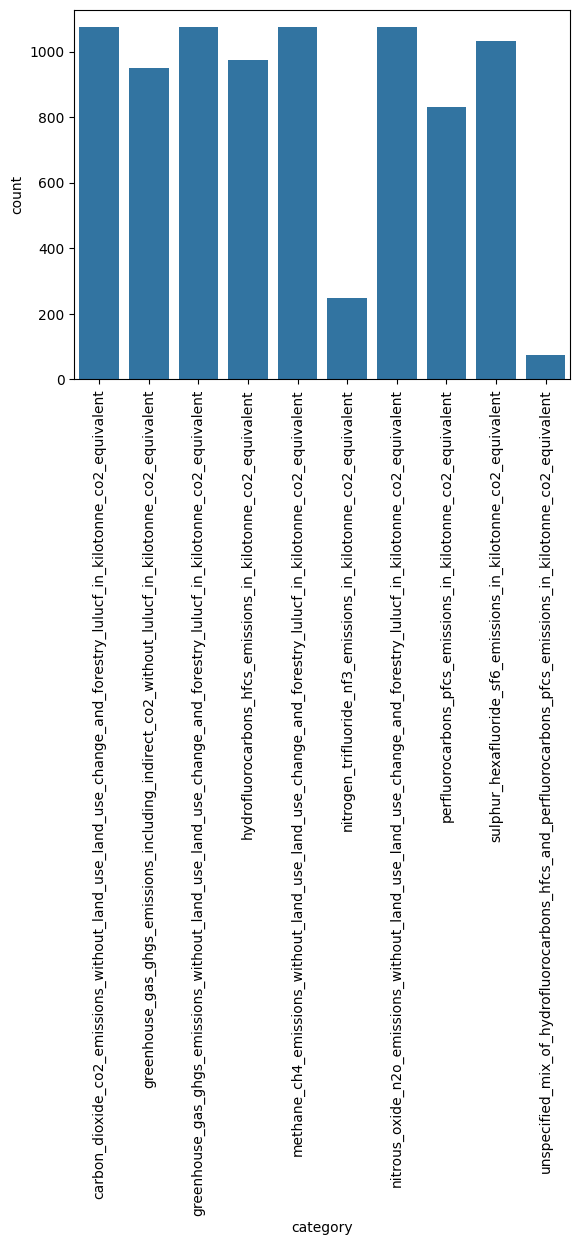

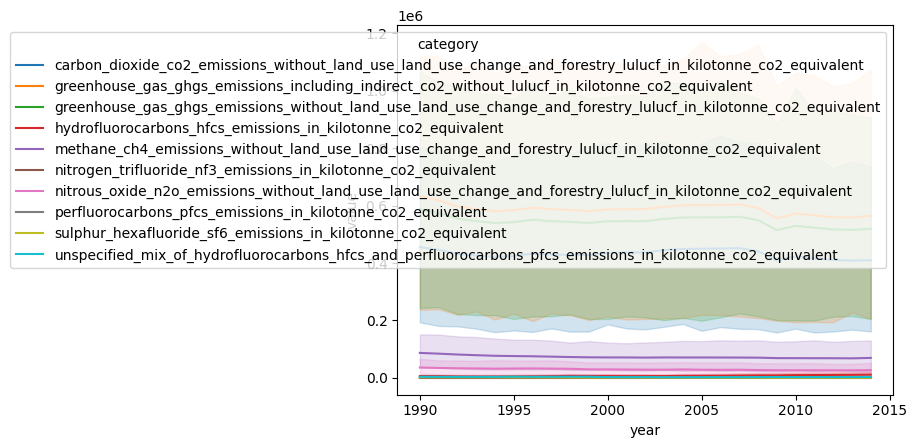

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik verilerin dağılımını incele
sns.countplot(data=df, x='category')
plt.xticks(rotation=90)
plt.show()

# Yıl ve değer (emisyon) arasındaki ilişkiyi incele
sns.lineplot(data=df, x='year', y='value', hue='category')
plt.show()


# 4. Feature Engineering


In [6]:
from sklearn.preprocessing import LabelEncoder

# Kategorik değişkenleri etiketleyici ile dönüştür
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Gerekli sütunları seç
X = df[['year', 'category_encoded']]
y = df['value']


# 5. Model Kurma ve Değerlendirme


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import a regression model
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Modeli kur (Linear Regression kullanarak)
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Modelin performansını değerlendir (Regression metrics)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 574330343569.329
R-squared: 0.0535347359861712


In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi eğitim ve test setlerine %50 oranında ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Use XGBRegressor for regression tasks
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Modelin performansını değerlendir (Use regression metrics)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 594747818229.637
R-squared: 0.0198878448524602
